# Partícula en un anillo. 

En este ejercicio se estudiará un problema común en mecánica cuántica, que consiste en una 
partícula que gira generando un anillo como trayectoria. Para este sistema, el hamiltoniano en coordenadas 
cartesianas es : 

$$ \hat{H} = -\cfrac{\hbar ^2}{2m} \left ( \cfrac{d^2}{dx^2} + \cfrac{d^2}{dy^2} \right ) $$ 
   
 
Debido a la simetría del problema, el cambio a coordenadas polares definiendo: 
$$ x = rcos(\theta ) $$
$$ y = rsin(\theta ) $$ 
donde r es una constante ,da por resultado  la ecuación de Schrodinger: 
$$ \hat{H} \psi (\theta ) = -\cfrac{\hbar ^2}{2I} \cfrac{d^2 \psi (\theta ) }{d\theta ^2} = E \psi (\theta)    $$  

siendo I el momento de inercia: 
$$ I = mr^2 $$ 

Como en este caso solo existe un único grado de libertad ($\theta $), solo habrá un número cuántico. La cuantización surge del hecho de imponer las condiciones de frontera al problema: 
$$ \psi (\theta + 2\pi ) = \psi (\theta ) $$ 

In [11]:
import sympy as sp   # Módulo de álgebra simbólica 
import numpy as np  
from sympy import Symbol, Function , Eq 
sp.init_printing()

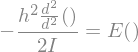

In [19]:
# Definimos las variables involucradas: 
h = Symbol("h", Positive=True )
θ = Symbol("θ")
I = Symbol("I" , Positive = True)
Ψ = Function("Ψ")(θ)
m = Symbol("m", Positive=True)
E = Symbol("E")
#ahora escribimos la ecuación diferencial 
eqn= Eq(-h**2/(2*I)* sp.diff(Ψ,θ,2) , E*Ψ)
eqn 


In [20]:
# Utilizamos la función dsolve() 

solucion = sp.dsolve(eqn)
solucion 

De lo anterior vemos que las soluciones son del tipo:
$$\psi (\theta) = C e^{in\theta } $$ 
Con 
$$ n = \cfrac{\sqrt{2EI}} {\hbar}  $$ 

Con las condiciones a la frontera: 

$$e^{in\theta} = e^{in\theta + 2\pi} = e^{in\theta} e^{2in\pi} $$ 

Por lo tanto : 

$$ 1 = e^{2in\pi} $$

Por identidad de Euler: 

$$ 1 = cos(2\pi n \theta) + isin(2\pi n\theta ) $$ 

Lo que implica que forzosamente: 

$$ n = 0 , \pm 1 , \pm 2 ... $$ 

Finalmente, despejando la energía en términos del número cuántico: 
$$ E = \cfrac{n^2 \hbar ^2}{2I} $$ 

In [40]:
## Ahora veremos cómo está cuantizada la energía, graficando para varios valores de n 

import matplotlib.pyplot as plt
from scipy import constants
h = constants.physical_constants["Planck constant"]
hbar = h[0]/(2*sp.pi) 
m = 9.1E-31   # Masa de un electrón 
r = 0.529E-10 #1 radio de Bohr 
I = m*r**2 

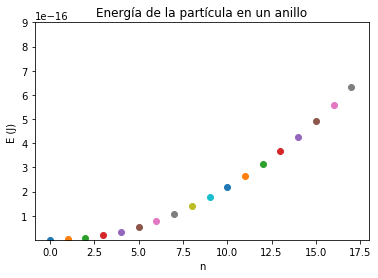

In [70]:
for n in range(0,18,1): #gráfica de la energía
    E = n**2*hbar**2/(2*I)
    plt.title("Energía de la partícula en un anillo")
    plt.xlabel("n")
    plt.ylabel("E (J) ")
    plt.ylim(9E-19,9E-16)
    plt.scatter(n,E)
    

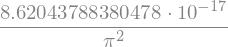

In [46]:
 E = 2**2*hbar**2/(2*I)
E 

Para graficar las distribuciones de probabilidad, $|\psi ^2 (\theta ) | $  debemos hallar las constantes tal que $\psi $ esté normalizada, es decir:

$$ C^2 \int _0 ^{2\pi} \psi ^* (\theta ) \psi (\theta ) d\theta = 1.0 $$ 

Cuyo resultado es:

$$ C = \cfrac{1}{\sqrt{2\pi}} $$ 

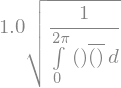

In [75]:
import numpy as np 
